# 2. Application of Fourier and wavelet transformations
## 2.1 Analysis of synthetic signals

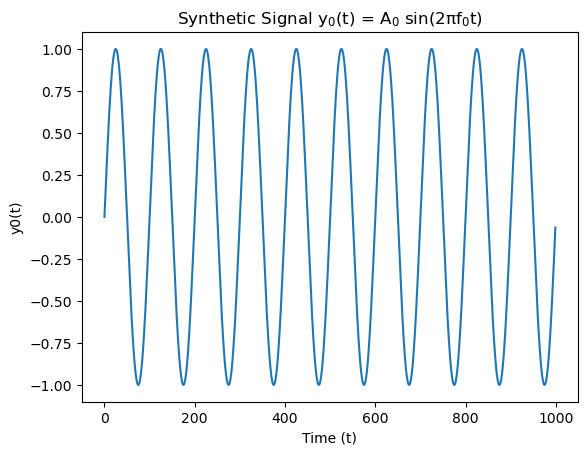

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A0 = 1.0  # Amplitude
f0 = 1e-2  # Frequency in Hz
N = 1e3   # Number of samples
delta_t = 1.  # Time step

t = np.arange(N)*delta_t

y0 = A0*np.sin(2*np.pi*f0*t)

plt.plot(t, y0)
plt.xlabel('Time (t)')
plt.ylabel('y0(t)')
plt.title('Synthetic Signal y$_0$(t) = A$_0$ sin(2πf$_0$t)')
plt.show()

In [3]:
delta_t = 1.0 
f_s = 1./delta_t
f_max = f_s/2.
f_min = 0

print(f"Minimum frequency (f_min): {f_min} Hz")
print(f"Maximum frequency (f_max): {f_max} Hz")

Minimum frequency (f_min): 0 Hz
Maximum frequency (f_max): 0.5 Hz


In [4]:
def calculate_dft_and_psd(signal, N, delta_t):

    i = len(signal)
    dft = np.zeros(i, dtype=complex)

    for k in range(i):
        for n in range(i):
            dft[k] += (1/N) * signal[n] * np.exp(-2j*np.pi*k*n/N)
    
    T = N*delta_t
    psd = (2*T/N**2) * np.abs(dft)**2
    
    return dft, psd

N = 1000
A0 = 1.0
f0 = 1e-2
delta_t = 1.0
t = np.arange(N) * delta_t
signal = A0 * np.sin(2*np.pi*f0*t)

dft, psd = calculate_dft_and_psd(signal, N, delta_t)

print("DFT:", dft[:3], dft[-3:])
print("\nPSD:", psd[:3], psd[-3:])

DFT: [1.30375311e-17+0.00000000e+00j 1.74827600e-18+2.37648858e-17j
 1.97866896e-17-1.67942281e-17j] [-2.32725352e-15+1.32776268e-15j  3.17466593e-15-1.50358025e-15j
 -8.87134875e-15-4.16217543e-15j]

PSD: [3.39954436e-37 1.13565253e-36 1.34711837e-36] [1.43581253e-32 2.46785147e-32 1.92049066e-31]


Signal: [0.         0.06279052 0.12533323] [-0.18738131 -0.12533323 -0.06279052]


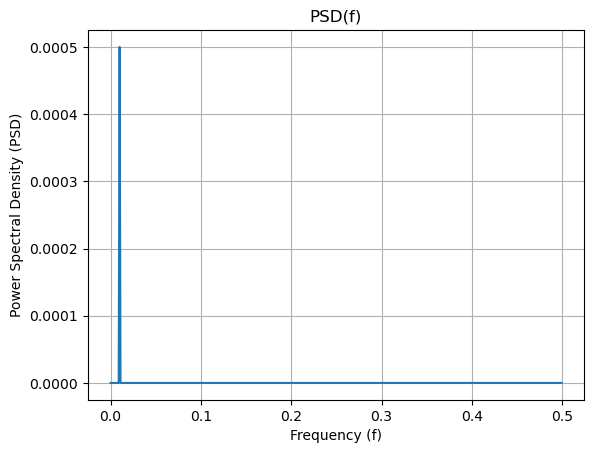

In [5]:
signal = A0 * np.sin(2*np.pi*f0*t)
print("Signal:", signal[:3], signal[-3:])
dft, psd = calculate_dft_and_psd(signal, N, delta_t)

frequencies = np.fft.fftfreq(N, delta_t)
mask = frequencies >= 0
frequencies = frequencies[mask]
psd = psd[mask]

plt.plot(frequencies, psd)
plt.xlabel('Frequency (f)')
plt.ylabel('Power Spectral Density (PSD)')
plt.title('PSD(f)')
plt.grid(True)
plt.show()

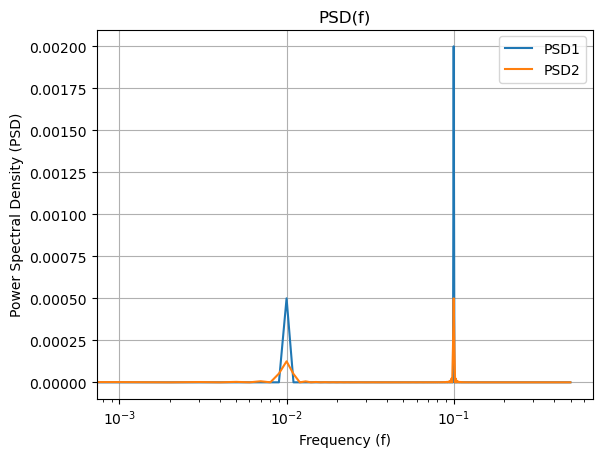

In [6]:
f0 = 1e-2
f1 = 1e-1
A0 = 1.0
A1 = 2.0
N = 1000
delta_t = 1.0
t = np.arange(N) * delta_t
T = N * delta_t

signal1 = A0*np.sin(2*np.pi*f0*t) + A1*np.sin(2*np.pi*f1*t)

signal2 = np.zeros(N)

for i in range(N):  
    t = i * delta_t
    if t < T / 2:
        signal2[i] = A0 * np.sin(2 * np.pi * f0 * t)
    else:
        signal2[i] = A1 * np.sin(2 * np.pi * f1 * t)

dft1, psd1 = calculate_dft_and_psd(signal1, N, delta_t)
dft2, psd2 = calculate_dft_and_psd(signal2, N, delta_t)

frequencies = np.fft.fftfreq(N, delta_t)
mask = frequencies >= 0
frequencies = frequencies[mask]
psd1 = psd1[mask]
psd2 = psd2[mask]

plt.plot(frequencies, psd1, label='PSD1')
plt.plot(frequencies, psd2, label='PSD2')
plt.xlabel('Frequency (f)')
plt.ylabel('Power Spectral Density (PSD)')
plt.xscale('log')
plt.title('PSD(f)')
plt.legend()
plt.grid(True)
plt.show()


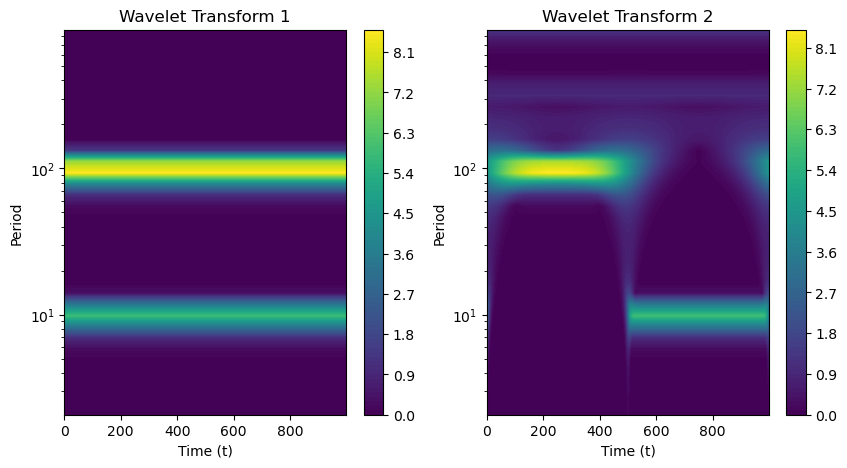

In [7]:
from waveletFunctions import wavelet

delta_t = 1.0
t = np.arange(N) * delta_t
wave1, period1, scale1, coi1 = wavelet(signal1,delta_t)
wave2, period2, scale2, coi2 = wavelet(signal2,delta_t)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.contourf(np.arange(N), period1, np.abs(wave1), 100)
plt.xlabel('Time (t)')
plt.ylabel('Period')
plt.title('Wavelet Transform 1')
plt.yscale('log')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.contourf(np.arange(N), period2, np.abs(wave2), 100)
plt.xlabel('Time (t)')
plt.ylabel('Period')
plt.title('Wavelet Transform 2')
plt.yscale('log')
plt.colorbar()
plt.show()

## 2.2 In-situ data analysis
### 2.2.1 Read the data

In [7]:
import scipy as sp
from scipy.io.idl import readsav
import matplotlib.pyplot as plt
from waveletFunctions import wavelet

/var/folders/l4/212nnx6x7816r9kh3wjl9f7w0000gn/T/ipykernel_19670/9716877.py:2: DeprecationWarning: Please use `readsav` from the `scipy.io` namespace, the `scipy.io.idl` namespace is deprecated.
  from scipy.io.idl import readsav


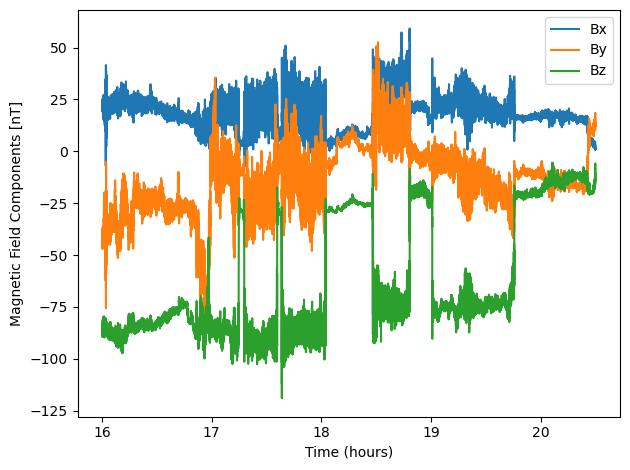

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

# Read the data from the .sav file
data = readsav("mix_c1_20010331.sav")

# Extract time and convert to hours
t_hours = data['t_sc'] / 3600

# Plot bx, by, and bz against time
B = ['Bx', 'By', 'Bz']
for component in B:
    plt.plot(t_hours, data[component], label=component)

# Add labels and legend
plt.xlabel('Time (hours)')
plt.ylabel('Magnetic Field Components [nT]')
plt.legend()
plt.tight_layout()  # Adjust layout to remove white space
plt.show()

### 2.2.2 Make a zoom for a shorter time interval

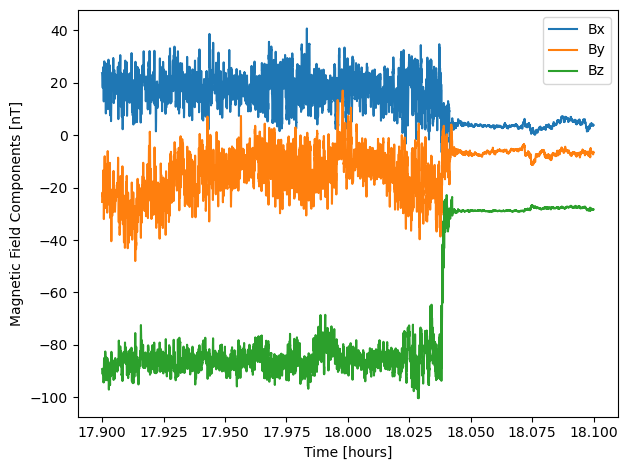

In [30]:
# Filter the time range
idx = np.where(np.logical_and(t >= 17.9, t <= 18.1))

# Extract the relevant data within the specified time range
t_sec = data['t_sc'][idx[0][0]:idx[0][-2]]
t_hours = t_sec/3600
bx = data['bx'][idx[0][0]:idx[0][-2]]
by = data['by'][idx[0][0]:idx[0][-2]]
bz = data['bz'][idx[0][0]:idx[0][-2]]

# Plot bx, by, and bz against time
B = {'Bx': bx, 'By': by, 'Bz': bz}
for label, component in B.items():
    plt.plot(t_hours, component, label=label)

# Add labels and legend
plt.xlabel('Time [hours]')
plt.ylabel('Magnetic Field Components [nT]')
plt.legend()
plt.tight_layout()  # Adjust layout to remove white space
plt.show()

### 2.2.3. Apply the WT to Bx(t).
Plot the scalogram together with coi(t). To represent the
scalogram use plt.contourf(time,period,power).
Determine minimal and maximal time scale τ.

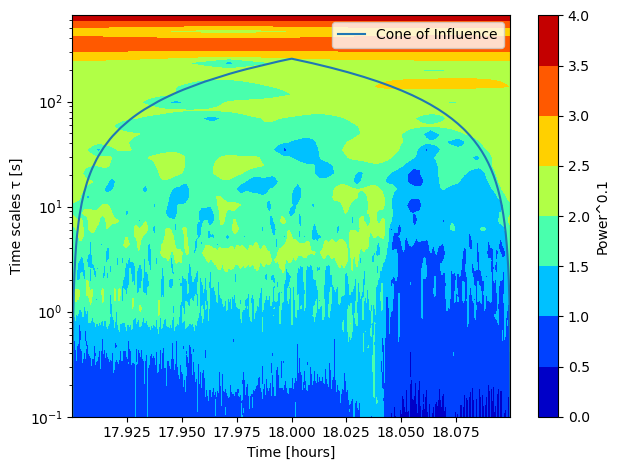

In [31]:
dt = t_sec[1] - t_sec[0]
wave, period, scale, coi = wavelet(bx, dt)

# Calculate power
power = np.abs(wave)**2

# Create the plot
plt.figure()
contour = plt.contourf(t_hours, period, power**0.1, cmap='jet')
plt.yscale('log')
plt.plot(t_hours, coi, label='Cone of Influence')

# Set the lower limit of the y-axis to a small positive value
plt.ylim(bottom=1e-1)

# Add labels and legend
plt.xlabel('Time [hours]')
plt.ylabel('Time scales τ [s]')
plt.legend()
plt.colorbar(contour, label='Power^0.1')

# Adjust layout to remove white space and show the plot
plt.tight_layout()
plt.show()

Using the scalogram, choose a homogeneous time interval and then apply FT to it
using FFT of Python (nampy.ﬀt.ﬀt). Calculate the PSD of Bx. Give minimal fmin and
maximal fmax frequencies.

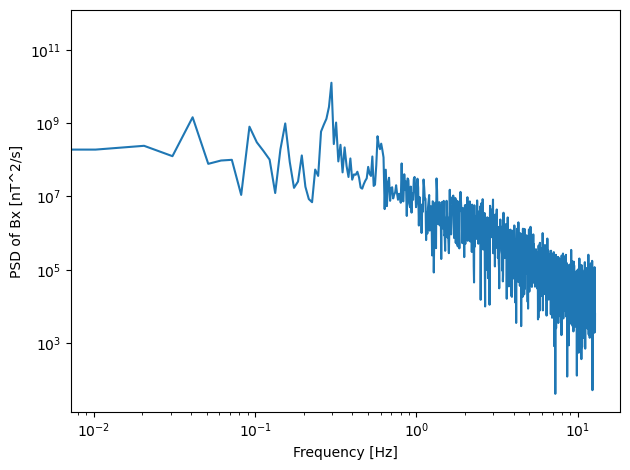

Minimum frequency (fmin): 0.01
Maximum frequency (fmax): 12.495


In [52]:
# Define the time range
t1 = 64650
t2 = 64750
T = t2 - t1

# Filter the time range
ind = np.where(np.logical_and(time >= t1, time <= t2))

# Extract the relevant data within the specified time range
bx_ind = bx[ind[0][0]:ind[0][-1]]
time_ind = t_sec[ind[0][0]:ind[0][-1]]
Nx_ind = len(bx_ind)

# Calculate frequency range
f_min = 1 / T
f_max = Nx_ind / 2 / T
freq_bx = np.fft.fftfreq(Nx_ind, dt)[:Nx_ind // 2]

# Perform FFT and calculate Power Spectral Density (PSD)
fft_bx = np.fft.fft(bx_ind)
PSD_bx = 2 * T * np.abs(fft_bx[:Nx_ind // 2])**2 

# Plot the PSD
plt.plot(freq_bx, PSD_bx)
plt.ylabel('PSD of Bx [nT^2/s]')
plt.xlabel('Frequency [Hz]')
plt.yscale('log')
plt.xscale('log')
plt.tight_layout()  # Adjust layout to remove white space
plt.show()

# Print minimum and maximum frequencies
print("Minimum frequency (fmin):", fmin)
print("Maximum frequency (fmax):", fmax)

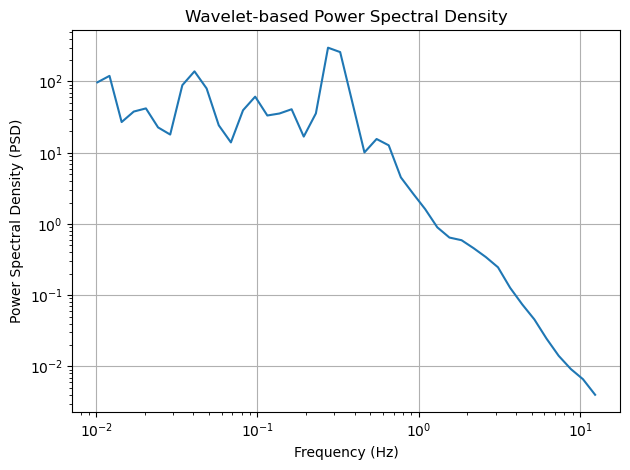

In [53]:
# Define the time range
t1 = 64650
t2 = 64750
T = t2 - t1

# Filter the time range
ind = np.where(np.logical_and(t_sec >= t1, t_sec <= t2))

# Extract the relevant data within the specified time range
wave_ind = wave[:, ind[0][0]:ind[0][-1]]
power_ind = np.abs(wave_ind)**2

# Calculate average power and frequencies
avg_power = power_ind.mean(axis=1)
frequencies = 1 / period
psd_wavelet = 2 * dt * avg_power

# Create a mask to filter the frequencies within the desired range
mask = np.logical_and(frequencies >= f_min, frequencies <= f_max)

# Apply the mask to the frequencies and psd_wavelet arrays
filtered_frequencies = frequencies[mask]
filtered_psd_wavelet = psd_wavelet[mask]

# Plot the Power Spectral Density (PSD) within the desired frequency range
plt.plot(filtered_frequencies, filtered_psd_wavelet)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (PSD)')
plt.xscale('log')
plt.yscale('log')
plt.title('Wavelet-based Power Spectral Density')
plt.grid(True)
plt.tight_layout()  # Adjust layout to remove white space
plt.show()

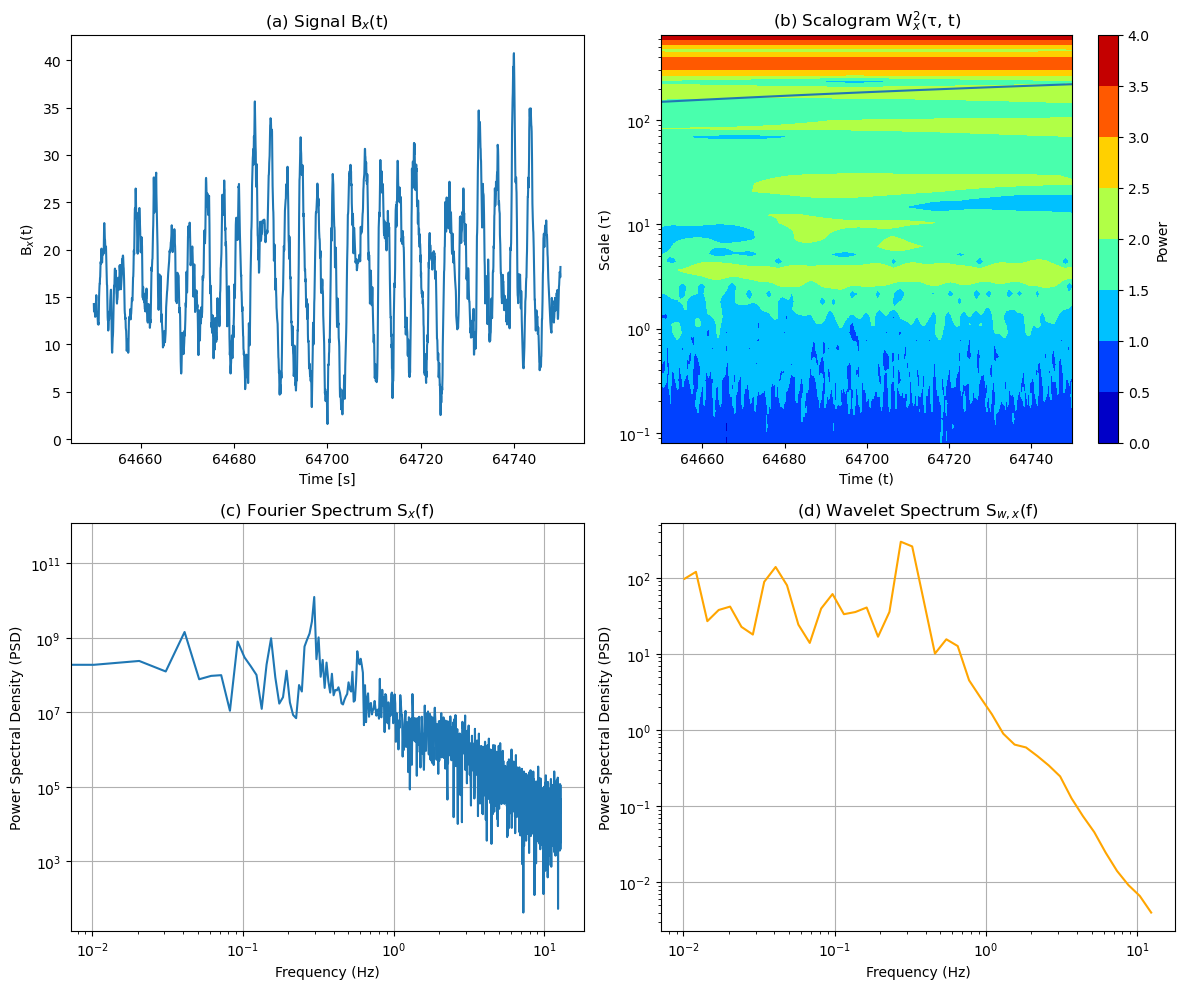

In [54]:
# Define the time range
t1 = 64650
t2 = 64750
T = t2 - t1

# Filter the time range
ind = np.where(np.logical_and(t_sec >= t1, t_sec <= t2))

# Extract the relevant data within the specified time range
time_ind = t_sec[ind[0][0]:ind[0][-1]]
bx_ind = bx[ind[0][0]:ind[0][-1]]
wave_ind = wave[:, ind[0][0]:ind[0][-1]]
power_ind = np.abs(wave_ind)**2

# Calculate average power and frequencies
avg_power = power_ind.mean(axis=1)
frequencies = 1 / period
psd_wavelet = 2 * dt * avg_power

# Create a mask to filter the frequencies within the desired range
mask = np.logical_and(frequencies >= f_min, frequencies <= f_max)

# Apply the mask to the frequencies and psd_wavelet arrays
filtered_frequencies = frequencies[mask]
filtered_psd_wavelet = psd_wavelet[mask]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# (a) Signal Bx(t) Plot
axs[0, 0].plot(time_ind, bx_ind)
axs[0, 0].set_xlabel('Time [s]')
axs[0, 0].set_ylabel('B$_x$(t)')
axs[0, 0].set_title('(a) Signal B$_x$(t)')

# (b) Scalogram W2x(τ,t)
# Plot the scalogram using contourf, with log scale for the y-axis (periods/scales)
c = axs[0, 1].contourf(time_ind, period, power_ind**0.1, cmap='jet')
axs[0, 1].set_yscale('log')
axs[0, 1].plot(time_ind, coi[ind[0][0]:ind[0][-1]])
axs[0, 1].set_xlabel('Time (t)')
axs[0, 1].set_ylabel('Scale (τ)')
axs[0, 1].set_title('(b) Scalogram W$_x^2$(τ, t)')
plt.colorbar(c, ax=axs[0, 1], label='Power')

# (c) Fourier Spectrum Sx(f)
axs[1, 0].plot(freq_bx, PSD_bx, label='Fourier PSD')
axs[1, 0].set_xscale('log')
axs[1, 0].set_yscale('log')
axs[1, 0].set_xlabel('Frequency (Hz)')
axs[1, 0].set_ylabel('Power Spectral Density (PSD)')
axs[1, 0].set_title('(c) Fourier Spectrum S$_x$(f)')
axs[1, 0].grid(True)

# (d) Wavelet Spectrum Sw,x(f)
axs[1, 1].plot(filtered_frequencies, filtered_psd_wavelet, label='Wavelet PSD', color='orange')
axs[1, 1].set_xscale('log')
axs[1, 1].set_yscale('log')
axs[1, 1].set_xlabel('Frequency (Hz)')
axs[1, 1].set_ylabel('Power Spectral Density (PSD)')
axs[1, 1].set_title('(d) Wavelet Spectrum S$_{w,x}$(f)')
axs[1, 1].grid(True)

# Adjust layout to remove white space and show the plot
plt.tight_layout()
plt.show()

In [49]:
1/T

0.01